In [2]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['A1_dataset.csv']))

Saving A1_dataset.csv to A1_dataset (1).csv


In [4]:
df

,LABEL,DATE_TIME,TEXT
0,0,Fri Jun 05 14:26:50 2009,About to get threaded and scared
1,1,Thu May 14 10:13:55 2009,@awaisnaseer I like Shezan Mangooo too!!! I ha...
2,1,Fri Jun 05 21:02:20 2009,worked on my car after work. showering then go...
3,1,Sun Jun 14 22:25:52 2009,@Marama Actually we start this afternoon! I w...
4,1,Sun May 31 00:42:12 2009,@gfalcone601 Aww Gi.don't worry.we'll vote for...
...,...,...,...
4282,1,Sat Jun 06 22:45:26 2009,@QandQ My performances on my CLEP tests. #qshock
4283,0,Tue Jun 16 10:17:07 2009,"ugh no, rcn had all the true blood episodes on..."
4284,1,Fri May 01 22:00:42 2009,Just returned from the forest! Sarah (my merch...
4285,1,Sun Jun 07 02:09:46 2009,is proud of her dad and his piece of work. ( h...


# **Segregation into classes:**

In [5]:
x = df.iloc[:,1:]
y = df.iloc[:,0:1]

train_x = x.to_numpy()
train_y = y.to_numpy()

print(train_y.shape)


(4287, 1)


In [6]:
count_1=0
count_0=0
for i in range(len(train_y)):
  if(train_y[i]==1):
    count_1+=1
  if(train_y[i]==0):
    count_0+=1

t0 = []
t1 = []
for i in range(len(train_y)):
  if(train_y[i]==0):
    t0.append(train_x[i][1])
  else:
    t1.append(train_x[i][1])


# **SECTION 1**

##PART A

###**a):**

In [7]:
import re
for i in range(len(t0)):
  if((t0[i][(len(t0[i])-1)])!='.'):
    t0[i] += '.'

In [8]:
regex = r'\b([\W]*)[.?!]'
count0 = 0
for i in range(len(t0)):
  match = re.findall(regex, t0[i])
  count0 += len(match)

print(count0," Sentences in", len(t0), "tweets labeled as 0")

3691  Sentences in 2000 tweets labeled as 0


In [9]:
print("Avg no of sentances of class 0 (total sent/total tweets) ", count0/len(df))

Avg no of sentances of class 0 (total sent/total tweets)  0.860975040821087


In [10]:
for i in range(len(t0)):
  if((t1[i][(len(t1[i])-1)])!='.'):
    t1[i] += '.'

regex = r'\b([\W]*)[.?!]'
count1 = 0
for i in range(len(t1)):
  match = re.findall(regex, t1[i])
  count1 += len(match)
print(count1," Sentences in", len(t1), "tweets labeled as 1")

4325  Sentences in 2287 tweets labeled as 1


In [11]:
print("Avg no of sentances of class 1 (total sent/total tweets) ", count1/len(df))

Avg no of sentances of class 1 (total sent/total tweets)  1.0088640074644273


In [12]:
no_of_sentences = count0+count1
print("Approximately, number of sentences are: ", no_of_sentences,"in",(len(t0)+len(t1)),"tweets.")

Approximately, number of sentences are:  8016 in 4287 tweets.


In [21]:
regex = r'\w+|\W+'
count0 = 0
for i in range(len(t0)):
  match = re.findall(regex, t0[i])
  for j in range(len(match)):
    if(match[j]!=" "):
      count0+=1
print(count0," Tokens in", len(t0), "tweets labeled as 0")

35474  Tokens in 2000 tweets labeled as 0


In [22]:
print("Avg no of tokens of class 0 (total tokens/total tweets) ", count0/len(df))

Avg no of tokens of class 0 (total tokens/total tweets)  8.274784231397247


In [19]:
regex = r'\w+|\W+'
count1 = 0
for i in range(len(t1)):
  match = re.findall(regex, t1[i])
  for j in range(len(match)):
    # print(match[j])
    if(match[j]!=" "):
      count1+=1
print(count1," Tokens in", len(t1), "tweets labeled as 1")

39634  Tokens in 2287 tweets labeled as 1


In [20]:
print("Avg no of tokens of class 1 (total tokens/total tweets) ", count1/len(df))

Avg no of tokens of class 1 (total tokens/total tweets)  9.245159785397714


In [23]:
print("Total number of tokens in the dataset: ", count0+count1)

Total number of tokens in the dataset:  75108


###**b):**

In [24]:
regex = r'\b[aeiouAEIOU]\w*'
count0 = 0
for i in range(len(t0)):
  match = re.findall(regex, t0[i])
  count0+=len(match)
print(count0," Words starting with vowels in", len(t0), "tweets labeled as 0")

count1 = 0
for i in range(len(t1)):
  match = re.findall(regex, t1[i])
  count1+=len(match)
print(count1," Words starting with vowels in", len(t1), "tweets labeled as 1")

6990  Words starting with vowels in 2000 tweets labeled as 0
7189  Words starting with vowels in 2287 tweets labeled as 1


In [25]:
regex = r'\b[^aeiouAEIOU|\s]\w*'
count0 = 0
for i in range(len(t0)):
  match = re.findall(regex, t0[i])
  count0+=len(match)
print(count0," Words starting with consonants in", len(t0), "tweets labeled as 0")

count1 = 0
for i in range(len(t1)):
  match = re.findall(regex, t1[i])
  count1+=len(match)
print(count1," Words starting with consonants in", len(t1), "tweets labeled as 1")

24701  Words starting with consonants in 2000 tweets labeled as 0
27821  Words starting with consonants in 2287 tweets labeled as 1


###**c):**

In [26]:
df['TEXT'] = df['TEXT'].str.lower()
x = df.iloc[:,1:]
y = df.iloc[:,0:1]

train_x = x.to_numpy()
train_y = y.to_numpy()

In [27]:
count_1=0
count_0=0
for i in range(len(train_y)):
  if(train_y[i]==1):
    count_1+=1
  if(train_y[i]==0):
    count_0+=1

t0 = []
t1 = []
for i in range(len(train_y)):
  if(train_y[i]==0):
    t0.append(train_x[i][1])
  else:
    t1.append(train_x[i][1])

In [118]:
regex = r'\w+|\W+'
count0 = 0
count1=0
unique_tokens0 = 0 
unique_tokens1 = 0 

for i in range(len(t0)):
  match = re.findall(regex, t0[i])
  unique_tokens0 += len(set(match))

  for j in range(len(match)):
    if(match[j]!=" "):
      count0+=1
print(count0," Tokens in", len(t0), "tweets labeled as 0")

for i in range(len(t1)):
  match = re.findall(regex, t1[i])
  unique_tokens1 += len(set(match))

  for j in range(len(match)):
    if(match[j]!=" "):
      count1+=1
print(count1," Tokens in", len(t1), "tweets labeled as 1")

print("Unique tokes for lebel 0", unique_tokens0)
print("Unique tokes for lebel 1", unique_tokens1)

34319  Tokens in 2000 tweets labeled as 0
38538  Tokens in 2287 tweets labeled as 1
Unique tokes for lebel 0 33883
Unique tokes for lebel 1 37933


### **d):** 

In [29]:
# part d count no of usernames 
pattern = re.compile(r'@\w{1,15}\s')
class0 = 0
class1 = 0
usernames = []
N = len(df)
for i in range(N):
  matches = pattern.findall(df['TEXT'][i])
  usernames.extend(matches)
  if df['LABEL'][i] == 0:
    class0 += len(matches)
  else:
     class1 += len(matches)

print("No of no of usernames in class 0: ", class0)
print("No of no of usernames in class 1: ", class1)
print("List of usernames : - \n", usernames)

No of no of usernames in class 0:  782
No of no of usernames in class 1:  1268
List of usernames : - 
 ['@awaisnaseer ', '@marama ', '@gfalcone601 ', '@mrstessyman ', '@getmevideo ', '@tb78 ', '@sokendrakouture ', '@realdeal32 ', '@yoginifoodie ', '@mileycyrus ', '@flyingbolt ', '@sctunstall ', '@digitallearnin ', '@ihauntwizards ', '@luke ', '@buckhollywood ', '@soycamo ', '@liverpool_tx ', '@alix_says ', '@domkoenig ', '@mykiaisosm ', '@cyberela ', '@sally_that_girl ', '@spencerpratt ', '@marginatasnaily ', '@bossmobb ', '@newerdeal ', '@meggles89 ', '@ferrite ', '@cmrush ', '@nachojohnny ', '@teambudd1 ', '@karon ', '@officialas ', '@mrskutcher ', '@eastcoastgamblr ', '@mitchelmusso ', '@nessie_111 ', '@the_gov ', '@nakulshenoy ', '@jeddimkins ', '@dannymcevoy ', '@uyennguyen_ ', '@peace_p ', '@markvanbaale ', '@courtney_182 ', '@davidarchie ', '@smithycurt ', '@fashionsourcing ', '@alexispratsides ', '@chuckiem ', '@micheleknight ', '@jacdo ', '@dj_sportschick ', '@johnny_trouble '

### **e):**

In [31]:
# part b words starting with consonents
pattern = re.compile(r'(https?:\/\/|www\.)\w+\.\w+')
class0 = 0
class1 = 0
urls = []
for i in range(N):
  matches = pattern.findall(df['TEXT'][i])
  if df['LABEL'][i] == 0:
    class0 += len(matches)
  else:
     class1 += len(matches)

print("No of urls in class 0: ", class0)
print("No of urls in class 1: ", class1)

No of urls in class 0:  60
No of urls in class 1:  135


In [32]:
#part f count no of tweets on each day of week
day = { 'Sun':0 , 'Mon':0, 'Tue':0, 'Wed':0, 'Thu':0, 'Fri':0, 'Sat':0 }
pattern = re.compile(r'(Sun|Mon|Tue|Wed|Thu|Fri|Sat)')

for i in range(N):
  match = pattern.findall(df['DATE_TIME'][i])
  day[match[0]] += 1

for key, value in day.items():
  print("No of tweets on ", key,'-',value)

No of tweets on  Sun - 1328
No of tweets on  Mon - 872
No of tweets on  Tue - 286
No of tweets on  Wed - 299
No of tweets on  Thu - 221
No of tweets on  Fri - 864
No of tweets on  Sat - 417


##PART B:

In [35]:
x = input()
y = r'\b'+x+r'\b'
l = int(input())
count_occ=0
count_tweet=0
count_sent=0
count_start=0
count_end=0
regex = r'\b([\W]*)[.?!]'
regex_mod_start = r'^'+x+r'\b'
regex_mod_end = r'\b'+x + r'$'
if l==0:
  for i in range(len(t0)):
    match = re.findall(y,t0[i])
    count_occ+=len(match)
    if(len(match)!=0):
      count_tweet+=1
      # print(t0[i])
      split = re.split('[.?!]',t0[i])
      # print(split)
      for j in range(len(split)):
        match = re.findall(y,split[j])
        if(len(match)!=0):
          count_sent+=1
        match = re.findall(regex_mod_start,split[j])
        if(len(match)>0): 
          count_start +=len(match)
        
        match = re.findall(regex_mod_end,split[j])
        if(len(match)>0): 
          count_end+=len(match)
       

else:
  for i in range(len(t1)):
    match = re.findall(y,t1[i])
    count_occ+=len(match)
    if(len(match)!=0):
      # print(t1[i],"CCCCCCCCCCCCCC")
      count_tweet+=1
      split = re.split('[.?!]',t1[i])
      # print(split,"CH")
      for j in range(len(split)):
        match = re.findall(y,split[j])
        # print(match,"CHECK HERE")
        if(len(match)!=0):
          count_sent+=1
        match = re.findall(regex_mod_start,split[j])
        count_start +=len(match)
        match = re.findall(regex_mod_end,split[j])
        count_end+=len(match)
        
print("Number of occurrences of", x, "is:", count_occ, ".The number of tweets in which it shows up is:", count_tweet, "The number of sentences in which this appeared is:", count_sent)
print("Number of sentences starting with the word",x,"is:",count_start)
print("Number of sentences ending with the word",x,"is:",count_end)




come
1
Number of occurrences of come is: 40 .The number of tweets in which it shows up is: 39 The number of sentences in which this appeared is: 40
Number of sentences starting with the word come is: 3
Number of sentences ending with the word come is: 0


# **SECTION B**

In [63]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('words')
from nltk.tokenize import word_tokenize
from nltk.metrics.distance  import edit_distance
from nltk.corpus import words
correct_words = words.words()
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
stop_words = list(stop_words)

stp_pattern = '('
for i in range(len(stop_words) - 1):
  stp_pattern += (stop_words[i] + '|')

stp_pattern += (stop_words[-1] + ')')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [107]:
# text preprocessing

def text_Preprocessing(sentance):

  sentance_tokens = word_tokenize(sentance)
  snowball = SnowballStemmer("english")

  for i in range(len(sentance_tokens)):
    sentance_tokens[i] = snowball.stem(sentance_tokens[i])

  
  # stemmer = PorterStemmer()
  # for i in range(len(sentance_tokens)):
  #   sentance_tokens[i] = stemmer.stem(sentance_tokens[i])

  lemmatizer = WordNetLemmatizer()
  for i in range(len(sentance_tokens)):
    sentance_tokens[i] = lemmatizer.lemmatize(sentance_tokens[i])

  sentance_tokens = ' '.join(sentance_tokens)
  tokenizer = nltk.RegexpTokenizer(r"\w+")
  sentance_tokens = tokenizer.tokenize(sentance_tokens)

  for i in range(len(sentance_tokens)):
    word = sentance_tokens[i]
    print(word)
    if word.isalpha() == False:
      continue
    temp = [(edit_distance(word, w),w) for w in correct_words if w[0]==word[0]]
    sentance_tokens[i]= (sorted(temp, key = lambda val:val[0])[0][1])

  sentance_tokens = ' '.join(sentance_tokens)     # joined the tokens using space so no need to remove space as it has been already taken care of
  pattern = re.compile(stp_pattern)
  pattern.sub("", sentance_tokens)       # substitution funtion to substitue the pattern found with empty string

  pattern = re.compile(r'((https?:\/\/|www\.)\w+\.\w+|</?\w>)') #either a url or HTML tag
  pattern.sub("", sentance_tokens)

  
  return sentance_tokens

In [108]:
t0_proc=[]
t1_proc=[]
for i in range(len(t0)):
  t0_proc.append(text_Preprocessing(t0[i]));

for i in range(len(t1)):
  t1_proc.append(text_Preprocessing(t1[i]));

In [109]:
print(t0_proc[:5])
print(t0[:5])

['about to get threaded and scared', 'need to shake this gloomy feeling maybe it s the rain', 'minecart ride now sarah s still too afraid to ride anything fun with me', 'sokendrakouture yea alone', 'flyingbolt not a good without you']
['about to get threaded and scared ', "needs to shake this gloomy feeling!!    maybe it's the rain???", "minecart ride now. sarah's still too afraid to ride anything fun with me. ", '@sokendrakouture yea alone ', '@flyingbolt  not as good without you! ']


In [110]:
t1_proc[:5]

['awaisnaseer i like shezan mangooo too i had one yesterday',
 'worked on my car after work showering then going to bed sooooooooooo tired sparrow signing out lt cowboy up gt',
 'marama actually we start this afternoon i will try to have something by wed it will be a slow process of collecting many on vac',
 'gfalcone601 aww gi do n t worry we ll vote for you non stop coz we love you so much',
 'mrstessyman what ever you do have a good day i love knitpicks']

# **SECTION 3**

In [111]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [112]:
s = (STOPWORDS)
print(s)
size = len(s)
w=[]
count=0
for i in s:
  # print(i)
  w.append(text_Preprocessing(i))
  
  count+=1
# print(len(w))

setw = set(w)

{'then', 'it', 'she', 'so', 'with', 'some', 'cannot', "i'm", "they've", "where's", "you'd", 'each', "let's", 'their', 'been', 'into', 'theirs', 'am', 'being', 'before', 'as', 'could', "i've", 'yourselves', 'do', 'both', 'nor', 'since', 'below', 'did', 'its', 'down', "he'll", 'most', "i'd", 'shall', 'same', "doesn't", 'after', 'an', 'a', 'further', 'get', 'in', 'is', 'yours', 'which', 'his', 'having', 'more', 'for', 'com', 'too', 'while', 'up', 'only', 'yourself', 'or', 'during', 'r', 'no', 'was', 'over', "you're", 'because', 'themselves', 'all', 'http', 'through', "they're", 'myself', "wasn't", "isn't", 'be', "when's", 'out', 'herself', "won't", "you'll", "hasn't", 'until', 'there', 'else', 'ourselves', "we'd", 'him', 'not', 'this', "who's", "i'll", 'other', 'very', 'however', 'once', "hadn't", "we've", 'under', "he'd", "don't", "that's", 'them', 'your', "we're", 'can', 'own', 'are', 'few', 'me', 'how', 'my', 'why', 'from', 'doing', 'our', 'these', "mustn't", "it's", 'ever', 'should', 

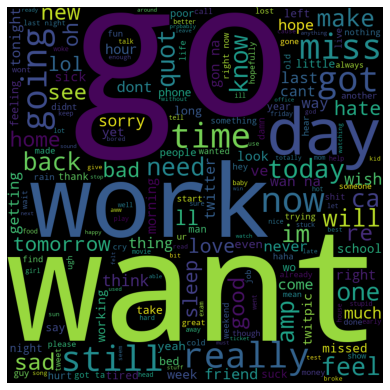

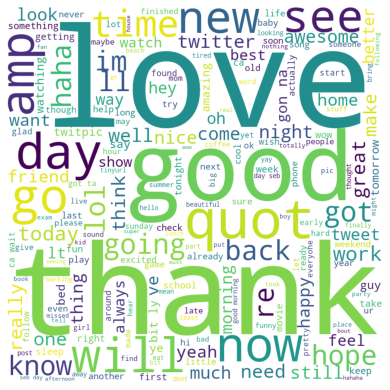

In [113]:
txt=""
for i in range(len(t0)):
  txt += t0_proc[i]

# stopwords = text_Preprocessing(set(STOPWORDS))
# stopwords = set(STOPWORDS)
st = set(STOPWORDS)
wordcloud1 = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = setw,
                min_font_size = 10,
                min_word_length=2).generate(txt)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud1)
plt.axis("off")
plt.tight_layout(pad = 10)
 
plt.show()

txt=""
for i in range(len(t1)):
  txt += t1_proc[i]

wordcloud2 = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = setw,
                min_font_size = 10,
                min_word_length=2).generate(txt)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud2)
plt.axis("off")
plt.tight_layout(pad = 10)
 
plt.show()

In [114]:
print("The word Work and Go have the most frequency in class labeled 0 i.e. most frequent words used in negative tweets are WORK and GO, however, the word love appears most in class labeled 1, i.e. the most frequent word used in positive tweets is LOVE ")

The word Work and Go have the most frequency in class labeled 0 i.e. most frequent words used in negative tweets are WORK and GO, however, the word love appears most in class labeled 1, i.e. the most frequent word used in positive tweets is LOVE 


# **SECTION 4**

In [115]:
# !pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [116]:
##Accuracy:
def acc(t0,label):
  correct0=0
  for i in range(len(t0)):
    vs = analyzer.polarity_scores(t0[i])
    if (label==0 and vs['compound'] <= - 0.05) :
      correct0 +=1
    if (label==1 and vs['compound'] >=  0.05) :
      correct0 +=1
  # print(correct0)
  return correct0/(len(t0))*100

def gen_labels(t0):
  correct0=0
  correct1=0
  for i in range(len(t0)):
    vs = analyzer.polarity_scores(t0[i])
    if (vs['compound'] <= - 0.05) :
      correct0 +=1
    if ( vs['compound'] >=  0.05) :
      correct1 +=1
  return correct0, correct1

In [117]:
tru_pos, mis_class = gen_labels(t0_proc)
print("No of tweets predicted as 0:",tru_pos,"No of tweets predicted as 1:",mis_class,"Actual label of these tweets:0")

tru_pos, mis_class = gen_labels(t1_proc)
print("No of tweets predicted as 0:",tru_pos,"No of tweets predicted as 1:",mis_class,"Actual label of these tweets:1")
print()
print()
print(acc(t0_proc,0),"%","is the accuracy of predicting pre-processed tweets with label 0")
print(acc(t1_proc,1),"%","is the accuracy of predicting pre-processed tweets with label 1")

print(acc(t0,0),"%","is the accuracy of predicting raw tweets with label 0")
print(acc(t1,1),"%","is the accuracy of predicting raw tweets with label 1")

No of tweets predicted as 0: 857 No of tweets predicted as 1: 668 Actual label of these tweets:0
No of tweets predicted as 0: 227 No of tweets predicted as 1: 1479 Actual label of these tweets:1


42.85 % is the accuracy of predicting pre-processed tweets with label 0
64.66987319632706 % is the accuracy of predicting pre-processed tweets with label 1
43.6 % is the accuracy of predicting raw tweets with label 0
62.396152164407525 % is the accuracy of predicting raw tweets with label 1
